In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math


In [9]:

data=pd.read_csv('/content/drive/MyDrive/reformed_datset.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110.5,0.565,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,170.18,159lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77.0,0.405,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,187.96,183lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118.5,0.290,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,175.26,150lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72.0,0.260,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,193.04,168lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102.0,0.355,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,154.94,154lbs,57.81547,57.81547,57.81547,59.03765,58.71939,58.71939,58.71939,59.03765,58.983129,58.983129,58.983129,...,56.806786,55.614626,55.614626,55.614626,56.806786,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [11]:
# slicing the dataset
dataset_considered=pd.DataFrame()
dataset_considered['Value']=data['Value']
dataset_considered['Wage']=data['Wage']

In [14]:
# Couputation of distance matrix
Distance_matrix=pd.DataFrame(index=range(len(dataset_considered['Value'])),columns=range(len(dataset_considered['Wage'])))

In [15]:
p=[0,0]
q=[0,0]
for i in range(len(Distance_matrix)):
  for j in range(len(Distance_matrix)):
    p[0]=dataset_considered['Value'][j]
    p[1]=dataset_considered['Wage'][j]
    q[0]=dataset_considered['Value'][i]
    q[1]=dataset_considered['Wage'][i]
    #Distance_matrix[i][j]=math.dist(dataset_considered['Value'][i],dataset_considered['Wage'][j])
    dist=math.sqrt(( (q[0]-p[0])**2)+((q[1]-p[1])**2))
    Distance_matrix[i][j]=dist
  

In [16]:
num_clusters = 0
all_elements=Distance_matrix.columns.tolist()
dissimilarity_matrix=Distance_matrix

In [17]:
# Average dissimilarity calculation within a cluster 
def avg_dissimilarity_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissimilarity = 0
    for i in element_list:
        sum_dissimilarity += dissimilarity_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissimilarity/(len(element_list)-1)
    else: 
        avg = 0
    return avg


In [18]:
# calculation of average dissimalrity across clusters
def avg_dissimilarity_across_group_element(ele, main_list, spl_list):
    if len(spl_list) == 0:
        return 0
    sum_dissimilarity = 0
    for j in spl_list:
        sum_dissimilarity = sum_dissimilarity + dissimilarity_matrix[ele][j]
    avg = sum_dissimilarity/(len(spl_list))
    return avg

In [19]:
def dissimilarity_calc(main_list, dissimilarity_calc_group): #calculation of disimilarity for the matrix elements 
    most_dissimilar = -np.inf
    most_dissimilar = None
    for ele in main_list:
        x = avg_dissimilarity_within_group_element(ele, main_list)
        y = avg_dissimilarity_across_group_element(ele, main_list, dissimilarity_calc_group)
        diff= x -y
        if diff > most_dissimilar:
            most_dissimilar = diff
            most_dissm_object_index = ele
    if(most_dissimilar>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)

In [20]:
def split(element_list):# splitting a cluster 
    main_list = element_list
    dissimilarity_calc_group = []    
    (most_dissm_object_index,flag) = dissimilarity_calc(main_list, dissimilarity_calc_group)
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        dissimilarity_calc_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = dissimilarity_calc(element_list, dissimilarity_calc_group)
    
    return (main_list, dissimilarity_calc_group)

In [21]:
def max_diameter(cluster_list): # calculation of maximum diameter of a given cluster
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    #print("The max diameter cluster index is{0}".format(max_diameter_cluster_index))
    return max_diameter_cluster_index

In [22]:
current_clusters = ([all_elements])
level = 1
index = 0
counterz=0# to count the total number of clusters formed
while(index!=-1):
    if counterz==5 :# Total clusters set to (5+1)=6 clusters
      break# Ending while loop when the desired cluster is achieved
    print(level, current_clusters)
    print(type(current_clusters[0]))
    counterz=counterz+1# my mod
    (sub_cluster_1, sub_cluster_2) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(sub_cluster_1)
    current_clusters.append(sub_cluster_2)
    index = max_diameter(current_clusters)
    level +=1


print(level, current_clusters) # printing the final cluster segregation 

1 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

In [23]:
value_cluster_1_points=[]
value_cluster_2_points=[]
value_cluster_3_points=[]
value_cluster_4_points=[]
value_cluster_5_points=[]
value_cluster_6_points=[]

wage_cluster_1_points=[]
wage_cluster_2_points=[]
wage_cluster_3_points=[]
wage_cluster_4_points=[]
wage_cluster_5_points=[]
wage_cluster_6_points=[]

In [24]:
for i in range(len(current_clusters[0])):
    value_cluster_1_points.append(dataset_considered['Value'][current_clusters[0][i]])
    wage_cluster_1_points.append(dataset_considered['Wage'][current_clusters[0][i]])

for i in range(len(current_clusters[1])):
    value_cluster_2_points.append(dataset_considered['Value'][current_clusters[1][i]])
    wage_cluster_2_points.append(dataset_considered['Wage'][current_clusters[1][i]])

for i in range(len(current_clusters[2])):
    value_cluster_3_points.append(dataset_considered['Value'][current_clusters[2][i]])
    wage_cluster_3_points.append(dataset_considered['Wage'][current_clusters[2][i]])

for i in range(len(current_clusters[3])):
    value_cluster_4_points.append(dataset_considered['Value'][current_clusters[3][i]])
    wage_cluster_4_points.append(dataset_considered['Wage'][current_clusters[3][i]])


for i in range(len(current_clusters[4])):
    value_cluster_5_points.append(dataset_considered['Value'][current_clusters[4][i]])
    wage_cluster_5_points.append(dataset_considered['Wage'][current_clusters[4][i]])
    

for i in range(len(current_clusters[5])):
    value_cluster_6_points.append(dataset_considered['Value'][current_clusters[5][i]])
    wage_cluster_6_points.append(dataset_considered['Wage'][current_clusters[5][i]])
    
        

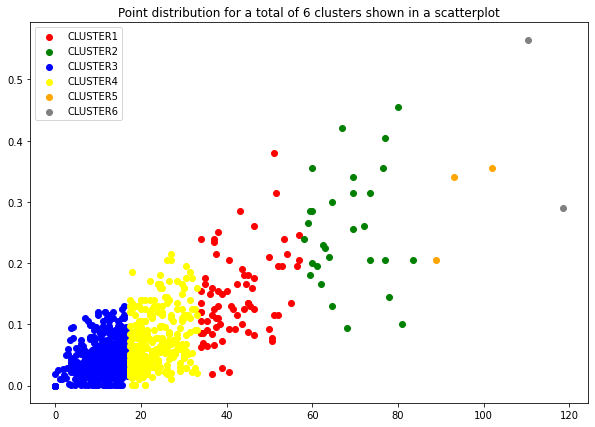

In [26]:

plt.figure(figsize=(10, 7))  

plt.scatter(value_cluster_1_points, wage_cluster_1_points ,c='Red')
plt.scatter(value_cluster_2_points, wage_cluster_2_points ,c='Green')
plt.scatter(value_cluster_3_points, wage_cluster_3_points ,c='Blue')
plt.scatter(value_cluster_4_points, wage_cluster_4_points ,c='Yellow')
plt.scatter(value_cluster_5_points, wage_cluster_5_points ,c='Orange')
plt.scatter(value_cluster_6_points, wage_cluster_6_points ,c='Grey')


plt.title("Point distribution for a total of 6 clusters shown in a scatterplot")  
plt.legend(["CLUSTER1","CLUSTER2","CLUSTER3","CLUSTER4","CLUSTER5","CLUSTER6"])
plt.show()

In [37]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(dataset_considered, orientation='left')
fig.update_layout(width=1000, height=700)
fig.show()